# Emerging Technology Assessment 2020
<hr>
This is my solution to the assessment that I must complete for the 2020 Emerging Technology module. My name is Sagheer Ahmad (G00357770@gmit.ie).

The aim of this project is to: 

```
    1. Jupyter notebook that trains a model using the data set. In the notebook you
       should explain your model and give an analysis of its accuracy.
    2. Python script that runs a web service based on the model, as above.
    3. Dockerfile to build and run the web service in a container.
    4. Standard items in a git repository such as a README.
```

This jupyter notebook will be used for the first part of the project. I will be creating a model based on the data that we have recieved and creating a model using keras and tensorflow. 

***
Before we start the coding aspect of this project, we need to get a better understanding of wind turbines and how they produce power depending on the speed of the wind. 

According to wikipedia, Wind turbine design is the process of defining the form and specifications of a wind turbine to extract energy from the wind. A wind turbine installation consists of the necessary systems needed to capture the wind's energy, point the turbine into the wind, convert mechanical rotation into electrical power, and other systems to start, stop, and control the turbine.[1]

The wind turbines are controlled for efficiency and making sure the wind turbines can handle the speed and the torque. The blades on the wind turbines increase as the speed increases which can cause the turbine to be sensitive to high speeds. Wind turbines have a cut in speed of 3 to 4 m/s and a cut off rate of 25 m/s this can be seen in the dataset that we will be using which shows the speed and power of the wind turbines. The dataset has a a very low value at the start and a value of 0 where the speed is 25 or above. Sometimes the value can be 0 even though the winds are high and this can be due to the wind turbines not efficiently storing the electricity or the wind turbines malfunctioning.

![](https://upload.wikimedia.org/wikipedia/commons/6/67/Powercurve.png)

[1] Wind turbine design
[https://en.wikipedia.org/wiki/Wind_turbine_design#:~:text=Wind%20turbines%20have%20ways%20of,power%20has%20to%20be%20limited.]

*** 
These are the neccessary imports that will be used to create a model and plot the results onto a graph.

In [4]:
# import numpy class
import numpy as np
# import panda class for handling data
import pandas as pd
# Plotting
import matplotlib.pyplot as plt
# keras imports to split the dataset for training and testing 
import tensorflow as tf
# Neural networks.
import tensorflow.keras as kr
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.python.keras.models import Model

<hr>
The program is currently Reading in the data using the panda class. It is taking in the link that was provided on Moodle and saving it into the powerProduction variable. The data being read in is from a csv file. A csv file is a basic text file. Csv is used for storing tabular data in text form, meaning the commas are used to seperate each column and newlines are used to seperate rows. Typically, the first row in a CSV file contains the names of the columns for the data. [1]

The data is then printed out out using the head function. The head function is part of the panda library and is use dto return the n number of rows from the data, for example in this instance it is returning the first 5 lines of data.

The describe function is used to output a summary of statistics relating to the dataframe columns. It prints values such as the Mean, STD, and the IQR values.[2]

[1] Reading data using the panda library  
https://www.shanelynn.ie/python-pandas-read_csv-load-data-from-csv-files/  

[2] The describe function  
https://www.tutorialspoint.com/python_pandas/python_pandas_descriptive_statistics.htm#:~:text=The%20describe()%20function%20computes,pertaining%20to%20the%20DataFrame%20columns.&text=This%20function%20gives%20the%20mean,given%20summary%20about%20numeric%20columns.  

In [5]:
#Read in the data from the link provided on moodle
powerProductionData = pd.read_csv("https://raw.githubusercontent.com/ianmcloughlin/2020A-machstat-project/master/dataset/powerproduction.csv")
#print out the results
powerProductionData.head(500)

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0
...,...,...
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0


In [6]:
#Generate descriptive statistics.
powerProductionData.describe()

,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


In [7]:
#https://keras.io/api/layers/core_layers/input/
#https://keras.io/guides/sequential_model/
#https://stackabuse.com/deep-learning-in-keras-building-a-deep-learning-model/

***
Here I am outputting the dataset to see what the values are like before i create the model and make any predictions. This is so that I have something to reference back to when i need to see if the predictions being made are accurate or not. I have titled the axis to make it easier to read the graph.

Text(0.5, 1.0, 'Model of Wind Turbine Speed and Power')

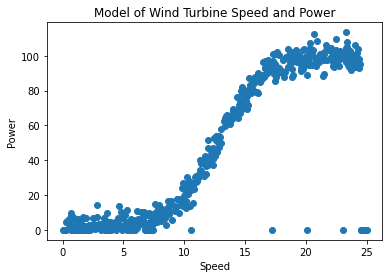

In [8]:
# Plot the values.
plt.plot(powerProductionData['speed'], powerProductionData['power'], 'o');

#label the x axis 
plt.xlabel('Speed')
#label the y axis 
plt.ylabel('Power')
# Set the title
plt.title('Model of Wind Turbine Speed and Power')

***
We are now creating a model that will be trained with the dataset so that it can make predictions. I am intially changing the dataset into arrays so that it is easier to read when the model.fit() is being performed. By using a colon we can take everything in the first dimension while using the comma we can take the first value within that point.

The second part of this code is creating a keras input which is used to instantiate a Keras tensor.[1]
```
A Keras tensor is a TensorFlow symbolic tensor object, which we augment with certain attributes that allow us to build a Keras model just by knowing the inputs and outputs of the model.
```

Next I create layers and give them a activation layer. I used sigmoid mainly as our dataset resembles a sigmoid function.
![](https://upload.wikimedia.org/wikipedia/commons/8/88/Logistic-curve.svg)

The model.compile configures the model for training. It takes in a few arguements that allow it to run. The first arguement is an optimizer instance, the next arguement is the loss arguemnet which we can use to set the type of the loss and the final I am is using is the metrics arguement. This allows us to set metrics=['accuracy'] this basically allows to create a history of the model and allow us to graph the loss and accuracy of the model.[2]

[1] Input Object
[https://keras.io/api/layers/core_layers/input/]

[2] Model training APIs
[https://keras.io/api/models/model_training_apis/]

***

# First attempt at the model
***
There was a couple ways to do this model. I tested a couple of these ways and found this was the most efficient and gave the best predictions. 

This was my initial start at creating a model using keras. This was a good start and gave me a better understanding of the loss and accuracy of the data. I wanted to get the loss to be lower and the predictions to be way more accurate.

In [9]:
# Train a different model.
model = kr.models.Sequential()
model.add(kr.layers.Dense(50, input_shape=(1,), activation='sigmoid', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
model.add(kr.layers.Dense(1, activation='linear', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
model.compile(kr.optimizers.Adam(lr=0.001), loss='mean_squared_error')

# Fit the data.
model.fit(powerProductionData['speed'], powerProductionData['power'], epochs=500, batch_size=10)

Epoch 1/500
50/50 [==============================] - 0s 2ms/step - loss: 3933.5044
Epoch 2/500
50/50 [==============================] - 0s 2ms/step - loss: 3734.2341
Epoch 3/500
50/50 [==============================] - 0s 2ms/step - loss: 3520.5857
Epoch 4/500
50/50 [==============================] - 0s 2ms/step - loss: 3279.7422
Epoch 5/500
50/50 [==============================] - 0s 2ms/step - loss: 3070.5349
Epoch 6/500
50/50 [==============================] - 0s 2ms/step - loss: 2913.4600
Epoch 7/500
50/50 [==============================] - 0s 2ms/step - loss: 2774.7983
Epoch 8/500
50/50 [==============================] - 0s 2ms/step - loss: 2642.8938
Epoch 9/500
50/50 [==============================] - 0s 2ms/step - loss: 2520.3574
Epoch 10/500
50/50 [==============================] - 0s 1ms/step - loss: 2408.2288
Epoch 11/500
50/50 [==============================] - 0s 2ms/step - loss: 2304.6743
Epoch 12/500
50/50 [==============================] - 0s 2ms/step - loss: 2207.9258
E

50/50 [==============================] - 0s 2ms/step - loss: 336.9767
Epoch 100/500
50/50 [==============================] - 0s 2ms/step - loss: 335.7783
Epoch 101/500
50/50 [==============================] - 0s 1ms/step - loss: 335.0398
Epoch 102/500
50/50 [==============================] - 0s 2ms/step - loss: 334.2955
Epoch 103/500
50/50 [==============================] - 0s 2ms/step - loss: 333.6862
Epoch 104/500
50/50 [==============================] - 0s 2ms/step - loss: 333.4778
Epoch 105/500
50/50 [==============================] - 0s 2ms/step - loss: 332.2972
Epoch 106/500
50/50 [==============================] - 0s 1ms/step - loss: 332.0071
Epoch 107/500
50/50 [==============================] - 0s 2ms/step - loss: 331.4452
Epoch 108/500
50/50 [==============================] - 0s 2ms/step - loss: 330.3317
Epoch 109/500
50/50 [==============================] - 0s 2ms/step - loss: 329.7040
Epoch 110/500
50/50 [==============================] - 0s 2ms/step - loss: 329.6504
Epoch 

50/50 [==============================] - 0s 1ms/step - loss: 285.1736
Epoch 197/500
50/50 [==============================] - 0s 1ms/step - loss: 284.8410
Epoch 198/500
50/50 [==============================] - 0s 1ms/step - loss: 284.2086
Epoch 199/500
50/50 [==============================] - 0s 1ms/step - loss: 284.1761
Epoch 200/500
50/50 [==============================] - 0s 1ms/step - loss: 283.5766
Epoch 201/500
50/50 [==============================] - 0s 2ms/step - loss: 282.8035
Epoch 202/500
50/50 [==============================] - 0s 2ms/step - loss: 282.5640
Epoch 203/500
50/50 [==============================] - 0s 2ms/step - loss: 282.1867
Epoch 204/500
50/50 [==============================] - 0s 2ms/step - loss: 282.0546
Epoch 205/500
50/50 [==============================] - 0s 2ms/step - loss: 281.6932
Epoch 206/500
50/50 [==============================] - 0s 2ms/step - loss: 281.3684
Epoch 207/500
50/50 [==============================] - 0s 2ms/step - loss: 280.9471
Epoch 

50/50 [==============================] - 0s 1ms/step - loss: 262.6395
Epoch 294/500
50/50 [==============================] - 0s 1ms/step - loss: 262.5631
Epoch 295/500
50/50 [==============================] - 0s 1ms/step - loss: 262.3220
Epoch 296/500
50/50 [==============================] - 0s 2ms/step - loss: 262.2497
Epoch 297/500
50/50 [==============================] - 0s 2ms/step - loss: 262.2610
Epoch 298/500
50/50 [==============================] - 0s 2ms/step - loss: 261.9943
Epoch 299/500
50/50 [==============================] - 0s 2ms/step - loss: 262.1817
Epoch 300/500
50/50 [==============================] - 0s 2ms/step - loss: 261.9016
Epoch 301/500
50/50 [==============================] - 0s 2ms/step - loss: 261.5833
Epoch 302/500
50/50 [==============================] - 0s 2ms/step - loss: 261.6123
Epoch 303/500
50/50 [==============================] - 0s 2ms/step - loss: 261.4063
Epoch 304/500
50/50 [==============================] - 0s 2ms/step - loss: 261.4958
Epoch 

50/50 [==============================] - 0s 2ms/step - loss: 255.9641
Epoch 391/500
50/50 [==============================] - 0s 2ms/step - loss: 255.7483
Epoch 392/500
50/50 [==============================] - 0s 2ms/step - loss: 255.7909
Epoch 393/500
50/50 [==============================] - 0s 2ms/step - loss: 255.7979
Epoch 394/500
50/50 [==============================] - 0s 2ms/step - loss: 255.5943
Epoch 395/500
50/50 [==============================] - 0s 2ms/step - loss: 255.6803
Epoch 396/500
50/50 [==============================] - 0s 2ms/step - loss: 255.5365
Epoch 397/500
50/50 [==============================] - 0s 2ms/step - loss: 255.8895
Epoch 398/500
50/50 [==============================] - 0s 2ms/step - loss: 255.7081
Epoch 399/500
50/50 [==============================] - 0s 2ms/step - loss: 255.3370
Epoch 400/500
50/50 [==============================] - 0s 2ms/step - loss: 255.3619
Epoch 401/500
50/50 [==============================] - 0s 2ms/step - loss: 255.3890
Epoch 

50/50 [==============================] - 0s 1ms/step - loss: 253.3721
Epoch 488/500
50/50 [==============================] - 0s 1ms/step - loss: 253.1457
Epoch 489/500
50/50 [==============================] - 0s 2ms/step - loss: 253.0056
Epoch 490/500
50/50 [==============================] - 0s 2ms/step - loss: 253.1900
Epoch 491/500
50/50 [==============================] - 0s 2ms/step - loss: 253.1968
Epoch 492/500
50/50 [==============================] - 0s 2ms/step - loss: 253.2044
Epoch 493/500
50/50 [==============================] - 0s 2ms/step - loss: 253.2805
Epoch 494/500
50/50 [==============================] - 0s 2ms/step - loss: 253.2372
Epoch 495/500
50/50 [==============================] - 0s 2ms/step - loss: 252.9906
Epoch 496/500
50/50 [==============================] - 0s 1ms/step - loss: 253.2033
Epoch 497/500
50/50 [==============================] - 0s 1ms/step - loss: 252.9265
Epoch 498/500
50/50 [==============================] - 0s 1ms/step - loss: 252.8280
Epoch 

Text(0.5, 1.0, 'Model of Wind Turbine Speed and Power')

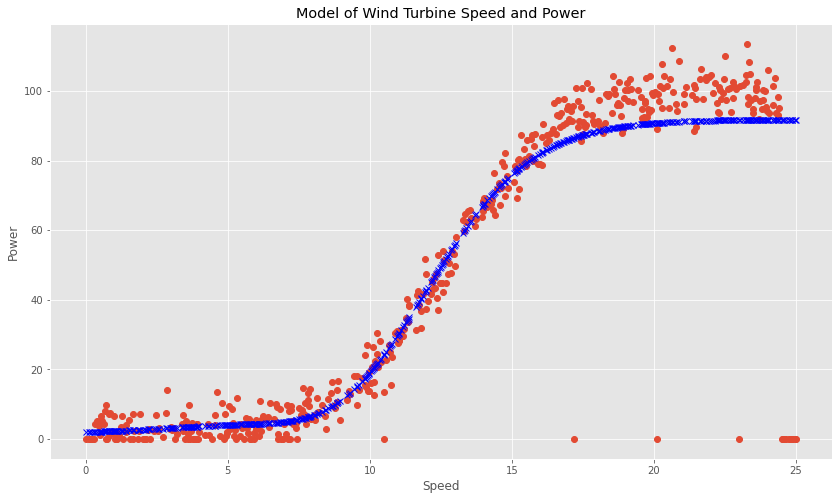

In [10]:
# Plot style.
plt.style.use("ggplot")
# Plot size.
plt.rcParams['figure.figsize'] = [14, 8]

# Plot the values.
plt.plot(powerProductionData['speed'], powerProductionData['power'], 'o');
plt.plot(powerProductionData['speed'], model.predict(powerProductionData['speed']), 'bx');

#label the x axis 
plt.xlabel('Speed')
#label the y axis 
plt.ylabel('Power')
# Set the title
plt.title('Model of Wind Turbine Speed and Power')

The second way i tried to do this model was using three layers with an activation layer of relu. I got a good loss, around mid 70s. But the graph was a bit all over the place. I next tried to add extra layers to the model and still no luck, I was getting a loss of 200 to 300. I next tried to change the activation layers and found that it improved the loss and the graph. I also experimented with different epochs and batch size values. 

# Second Attempt

In [67]:
x = powerProductionData.iloc[:,0].values
y = powerProductionData.iloc[:,1].values
xx = np.array(x)
yy = np.array(y)

#https://keras.io/api/layers/core_layers/input/
input1 = kr.Input(shape=(1,))

#https://keras.io/api/layers/activations/
l1 = Dense(10, activation='sigmoid')(input1)
l2 = Dense(50, activation='sigmoid')(l1)
l3 = Dense(50, activation='sigmoid')(l2)
l4 = Dense(50, activation='sigmoid')(l3)
l5 = Dense(50, activation='sigmoid')(l4)
l6 = Dense(50, activation='sigmoid')(l5)
l7 = Dense(50, activation='linear')(l6)
out = Dense(1)(l7)

model = Model(inputs=input1, outputs=[out])
model.compile(
    optimizer='adam',
    loss=['mean_squared_error'],
    metrics=['accuracy']
    )

modelHistory = model.fit(xx, yy, epochs=10000, batch_size=500)
model.predict([1.001])

Epoch 1/10000
1/1 [==============================] - 0s 2ms/step - loss: 4026.2566 - accuracy: 0.0980
Epoch 2/10000
1/1 [==============================] - 0s 1ms/step - loss: 3996.7534 - accuracy: 0.0980
Epoch 3/10000
1/1 [==============================] - 0s 999us/step - loss: 3967.3264 - accuracy: 0.0000e+00
Epoch 4/10000
1/1 [==============================] - 0s 2ms/step - loss: 3937.9460 - accuracy: 0.0000e+00
Epoch 5/10000
1/1 [==============================] - 0s 2ms/step - loss: 3908.5974 - accuracy: 0.0000e+00
Epoch 6/10000
1/1 [==============================] - 0s 1ms/step - loss: 3879.2632 - accuracy: 0.0000e+00
Epoch 7/10000
1/1 [==============================] - 0s 997us/step - loss: 3849.9241 - accuracy: 0.0000e+00
Epoch 8/10000
1/1 [==============================] - 0s 2ms/step - loss: 3820.5632 - accuracy: 0.0000e+00
Epoch 9/10000
1/1 [==============================] - 0s 1ms/step - loss: 3791.1619 - accuracy: 0.0000e+00
Epoch 10/10000
1/1 [==============================

1/1 [==============================] - 0s 2ms/step - loss: 1728.2373 - accuracy: 0.0000e+00
Epoch 154/10000
1/1 [==============================] - 0s 2ms/step - loss: 1728.2351 - accuracy: 0.0000e+00
Epoch 155/10000
1/1 [==============================] - 0s 2ms/step - loss: 1728.2329 - accuracy: 0.0000e+00
Epoch 156/10000
1/1 [==============================] - 0s 2ms/step - loss: 1728.2301 - accuracy: 0.0000e+00
Epoch 157/10000
1/1 [==============================] - 0s 2ms/step - loss: 1728.2273 - accuracy: 0.0000e+00
Epoch 158/10000
1/1 [==============================] - 0s 2ms/step - loss: 1728.2245 - accuracy: 0.0000e+00
Epoch 159/10000
1/1 [==============================] - 0s 2ms/step - loss: 1728.2217 - accuracy: 0.0000e+00
Epoch 160/10000
1/1 [==============================] - 0s 3ms/step - loss: 1728.2185 - accuracy: 0.0000e+00
Epoch 161/10000
1/1 [==============================] - 0s 3ms/step - loss: 1728.2156 - accuracy: 0.0000e+00
Epoch 162/10000
1/1 [=======================

1/1 [==============================] - 0s 2ms/step - loss: 1727.6598 - accuracy: 0.0000e+00
Epoch 304/10000
1/1 [==============================] - 0s 3ms/step - loss: 1727.6499 - accuracy: 0.0000e+00
Epoch 305/10000
1/1 [==============================] - 0s 2ms/step - loss: 1727.6400 - accuracy: 0.0000e+00
Epoch 306/10000
1/1 [==============================] - 0s 1ms/step - loss: 1727.6300 - accuracy: 0.0000e+00
Epoch 307/10000
1/1 [==============================] - 0s 3ms/step - loss: 1727.6198 - accuracy: 0.0000e+00
Epoch 308/10000
1/1 [==============================] - 0s 2ms/step - loss: 1727.6093 - accuracy: 0.0000e+00
Epoch 309/10000
1/1 [==============================] - 0s 1ms/step - loss: 1727.5985 - accuracy: 0.0000e+00
Epoch 310/10000
1/1 [==============================] - 0s 3ms/step - loss: 1727.5875 - accuracy: 0.0000e+00
Epoch 311/10000
1/1 [==============================] - 0s 2ms/step - loss: 1727.5763 - accuracy: 0.0000e+00
Epoch 312/10000
1/1 [=======================

1/1 [==============================] - 0s 999us/step - loss: 1409.8649 - accuracy: 0.0000e+00
Epoch 454/10000
1/1 [==============================] - 0s 999us/step - loss: 1386.7058 - accuracy: 0.0000e+00
Epoch 455/10000
1/1 [==============================] - 0s 3ms/step - loss: 1362.5938 - accuracy: 0.0000e+00
Epoch 456/10000
1/1 [==============================] - 0s 2ms/step - loss: 1337.5709 - accuracy: 0.0000e+00
Epoch 457/10000
1/1 [==============================] - 0s 1ms/step - loss: 1311.6876 - accuracy: 0.0000e+00
Epoch 458/10000
1/1 [==============================] - 0s 3ms/step - loss: 1285.0067 - accuracy: 0.0000e+00
Epoch 459/10000
1/1 [==============================] - 0s 2ms/step - loss: 1257.5887 - accuracy: 0.0000e+00
Epoch 460/10000
1/1 [==============================] - ETA: 0s - loss: 1229.4899 - accuracy: 0.0000e+0 - 0s 2ms/step - loss: 1229.4899 - accuracy: 0.0000e+00
Epoch 461/10000
1/1 [==============================] - 0s 3ms/step - loss: 1200.7894 - accuracy: 0

1/1 [==============================] - 0s 2ms/step - loss: 256.9851 - accuracy: 0.0000e+00
Epoch 605/10000
1/1 [==============================] - 0s 2ms/step - loss: 256.8737 - accuracy: 0.0000e+00
Epoch 606/10000
1/1 [==============================] - 0s 3ms/step - loss: 256.7623 - accuracy: 0.0000e+00
Epoch 607/10000
1/1 [==============================] - 0s 2ms/step - loss: 256.6553 - accuracy: 0.0000e+00
Epoch 608/10000
1/1 [==============================] - 0s 2ms/step - loss: 256.5485 - accuracy: 0.0000e+00
Epoch 609/10000
1/1 [==============================] - 0s 2ms/step - loss: 256.4447 - accuracy: 0.0000e+00
Epoch 610/10000
1/1 [==============================] - 0s 2ms/step - loss: 256.3427 - accuracy: 0.0000e+00
Epoch 611/10000
1/1 [==============================] - 0s 2ms/step - loss: 256.2419 - accuracy: 0.0000e+00
Epoch 612/10000
1/1 [==============================] - 0s 1ms/step - loss: 256.1440 - accuracy: 0.0000e+00
Epoch 613/10000
1/1 [==============================] 

1/1 [==============================] - 0s 3ms/step - loss: 250.3966 - accuracy: 0.0000e+00
Epoch 757/10000
1/1 [==============================] - 0s 2ms/step - loss: 250.3827 - accuracy: 0.0000e+00
Epoch 758/10000
1/1 [==============================] - 0s 2ms/step - loss: 250.3690 - accuracy: 0.0000e+00
Epoch 759/10000
1/1 [==============================] - 0s 4ms/step - loss: 250.3554 - accuracy: 0.0000e+00
Epoch 760/10000
1/1 [==============================] - 0s 1ms/step - loss: 250.3420 - accuracy: 0.0000e+00
Epoch 761/10000
1/1 [==============================] - 0s 2ms/step - loss: 250.3287 - accuracy: 0.0000e+00
Epoch 762/10000
1/1 [==============================] - 0s 2ms/step - loss: 250.3155 - accuracy: 0.0000e+00
Epoch 763/10000
1/1 [==============================] - 0s 1ms/step - loss: 250.3024 - accuracy: 0.0000e+00
Epoch 764/10000
1/1 [==============================] - 0s 2ms/step - loss: 250.2894 - accuracy: 0.0000e+00
Epoch 765/10000
1/1 [==============================] 

1/1 [==============================] - 0s 3ms/step - loss: 249.1797 - accuracy: 0.0000e+00
Epoch 909/10000
1/1 [==============================] - 0s 1ms/step - loss: 249.1752 - accuracy: 0.0000e+00
Epoch 910/10000
1/1 [==============================] - 0s 2ms/step - loss: 249.1707 - accuracy: 0.0000e+00
Epoch 911/10000
1/1 [==============================] - 0s 2ms/step - loss: 249.1663 - accuracy: 0.0000e+00
Epoch 912/10000
1/1 [==============================] - 0s 2ms/step - loss: 249.1618 - accuracy: 0.0000e+00
Epoch 913/10000
1/1 [==============================] - 0s 2ms/step - loss: 249.1574 - accuracy: 0.0000e+00
Epoch 914/10000
1/1 [==============================] - 0s 3ms/step - loss: 249.1531 - accuracy: 0.0000e+00
Epoch 915/10000
1/1 [==============================] - 0s 2ms/step - loss: 249.1487 - accuracy: 0.0000e+00
Epoch 916/10000
1/1 [==============================] - 0s 2ms/step - loss: 249.1444 - accuracy: 0.0000e+00
Epoch 917/10000
1/1 [==============================] 

Epoch 984/10000
1/1 [==============================] - 0s 2ms/step - loss: 248.9032 - accuracy: 0.0000e+00
Epoch 985/10000
1/1 [==============================] - 0s 2ms/step - loss: 248.9003 - accuracy: 0.0000e+00
Epoch 986/10000
1/1 [==============================] - 0s 3ms/step - loss: 248.8973 - accuracy: 0.0000e+00
Epoch 987/10000
1/1 [==============================] - 0s 2ms/step - loss: 248.8945 - accuracy: 0.0000e+00
Epoch 988/10000
1/1 [==============================] - 0s 2ms/step - loss: 248.8916 - accuracy: 0.0000e+00
Epoch 989/10000
1/1 [==============================] - 0s 2ms/step - loss: 248.8887 - accuracy: 0.0000e+00
Epoch 990/10000
1/1 [==============================] - 0s 2ms/step - loss: 248.8858 - accuracy: 0.0000e+00
Epoch 991/10000
1/1 [==============================] - 0s 3ms/step - loss: 248.8829 - accuracy: 0.0000e+00
Epoch 992/10000
1/1 [==============================] - 0s 2ms/step - loss: 248.8801 - accuracy: 0.0000e+00
Epoch 993/10000
1/1 [================

1/1 [==============================] - 0s 3ms/step - loss: 248.5692 - accuracy: 0.0000e+00
Epoch 1135/10000
1/1 [==============================] - 0s 2ms/step - loss: 248.5675 - accuracy: 0.0000e+00
Epoch 1136/10000
1/1 [==============================] - 0s 2ms/step - loss: 248.5657 - accuracy: 0.0000e+00
Epoch 1137/10000
1/1 [==============================] - 0s 3ms/step - loss: 248.5639 - accuracy: 0.0000e+00
Epoch 1138/10000
1/1 [==============================] - 0s 2ms/step - loss: 248.5622 - accuracy: 0.0000e+00
Epoch 1139/10000
1/1 [==============================] - 0s 1ms/step - loss: 248.5605 - accuracy: 0.0000e+00
Epoch 1140/10000
1/1 [==============================] - 0s 3ms/step - loss: 248.5588 - accuracy: 0.0000e+00
Epoch 1141/10000
1/1 [==============================] - 0s 1000us/step - loss: 248.5570 - accuracy: 0.0000e+00
Epoch 1142/10000
1/1 [==============================] - 0s 2ms/step - loss: 248.5553 - accuracy: 0.0000e+00
Epoch 1143/10000
1/1 [====================

1/1 [==============================] - 0s 2ms/step - loss: 248.3521 - accuracy: 0.0000e+00
Epoch 1285/10000
1/1 [==============================] - 0s 1ms/step - loss: 248.3602 - accuracy: 0.0000e+00
Epoch 1286/10000
1/1 [==============================] - 0s 999us/step - loss: 248.3635 - accuracy: 0.0000e+00
Epoch 1287/10000
1/1 [==============================] - 0s 2ms/step - loss: 248.3570 - accuracy: 0.0000e+00
Epoch 1288/10000
1/1 [==============================] - 0s 2ms/step - loss: 248.3471 - accuracy: 0.0000e+00
Epoch 1289/10000
1/1 [==============================] - 0s 999us/step - loss: 248.3439 - accuracy: 0.0000e+00
Epoch 1290/10000
1/1 [==============================] - 0s 3ms/step - loss: 248.3479 - accuracy: 0.0000e+00
Epoch 1291/10000
1/1 [==============================] - 0s 1ms/step - loss: 248.3505 - accuracy: 0.0000e+00
Epoch 1292/10000
1/1 [==============================] - 0s 2ms/step - loss: 248.3468 - accuracy: 0.0000e+00
Epoch 1293/10000
1/1 [===================

1/1 [==============================] - 0s 2ms/step - loss: 248.2028 - accuracy: 0.0000e+00
Epoch 1435/10000
1/1 [==============================] - 0s 2ms/step - loss: 248.2020 - accuracy: 0.0000e+00
Epoch 1436/10000
1/1 [==============================] - 0s 2ms/step - loss: 248.2012 - accuracy: 0.0000e+00
Epoch 1437/10000
1/1 [==============================] - 0s 2ms/step - loss: 248.2004 - accuracy: 0.0000e+00
Epoch 1438/10000
1/1 [==============================] - 0s 996us/step - loss: 248.1997 - accuracy: 0.0000e+00
Epoch 1439/10000
1/1 [==============================] - 0s 1000us/step - loss: 248.1989 - accuracy: 0.0000e+00
Epoch 1440/10000
1/1 [==============================] - 0s 2ms/step - loss: 248.1980 - accuracy: 0.0000e+00
Epoch 1441/10000
1/1 [==============================] - 0s 2ms/step - loss: 248.1973 - accuracy: 0.0000e+00
Epoch 1442/10000
1/1 [==============================] - 0s 4ms/step - loss: 248.1965 - accuracy: 0.0000e+00
Epoch 1443/10000
1/1 [==================

1/1 [==============================] - 0s 2ms/step - loss: 248.1006 - accuracy: 0.0000e+00
Epoch 1585/10000
1/1 [==============================] - 0s 2ms/step - loss: 248.1000 - accuracy: 0.0000e+00
Epoch 1586/10000
1/1 [==============================] - 0s 2ms/step - loss: 248.0994 - accuracy: 0.0000e+00
Epoch 1587/10000
1/1 [==============================] - 0s 2ms/step - loss: 248.0988 - accuracy: 0.0000e+00
Epoch 1588/10000
1/1 [==============================] - 0s 3ms/step - loss: 248.0982 - accuracy: 0.0000e+00
Epoch 1589/10000
1/1 [==============================] - 0s 2ms/step - loss: 248.0977 - accuracy: 0.0000e+00
Epoch 1590/10000
1/1 [==============================] - 0s 2ms/step - loss: 248.0971 - accuracy: 0.0000e+00
Epoch 1591/10000
1/1 [==============================] - 0s 2ms/step - loss: 248.0965 - accuracy: 0.0000e+00
Epoch 1592/10000
1/1 [==============================] - 0s 4ms/step - loss: 248.0959 - accuracy: 0.0000e+00
Epoch 1593/10000
1/1 [=======================

1/1 [==============================] - 0s 2ms/step - loss: 248.0243 - accuracy: 0.0000e+00
Epoch 1735/10000
1/1 [==============================] - 0s 2ms/step - loss: 248.0239 - accuracy: 0.0000e+00
Epoch 1736/10000
1/1 [==============================] - 0s 1ms/step - loss: 248.0235 - accuracy: 0.0000e+00
Epoch 1737/10000
1/1 [==============================] - 0s 3ms/step - loss: 248.0229 - accuracy: 0.0000e+00
Epoch 1738/10000
1/1 [==============================] - 0s 2ms/step - loss: 248.0225 - accuracy: 0.0000e+00
Epoch 1739/10000
1/1 [==============================] - 0s 2ms/step - loss: 248.0221 - accuracy: 0.0000e+00
Epoch 1740/10000
1/1 [==============================] - 0s 2ms/step - loss: 248.0217 - accuracy: 0.0000e+00
Epoch 1741/10000
1/1 [==============================] - 0s 2ms/step - loss: 248.0212 - accuracy: 0.0000e+00
Epoch 1742/10000
1/1 [==============================] - 0s 2ms/step - loss: 248.0207 - accuracy: 0.0000e+00
Epoch 1743/10000
1/1 [=======================

1/1 [==============================] - 0s 1ms/step - loss: 247.9626 - accuracy: 0.0000e+00
Epoch 1885/10000
1/1 [==============================] - 0s 1000us/step - loss: 247.9622 - accuracy: 0.0000e+00
Epoch 1886/10000
1/1 [==============================] - 0s 2ms/step - loss: 247.9619 - accuracy: 0.0000e+00
Epoch 1887/10000
1/1 [==============================] - 0s 2ms/step - loss: 247.9614 - accuracy: 0.0000e+00
Epoch 1888/10000
1/1 [==============================] - 0s 2ms/step - loss: 247.9611 - accuracy: 0.0000e+00
Epoch 1889/10000
1/1 [==============================] - 0s 2ms/step - loss: 247.9606 - accuracy: 0.0000e+00
Epoch 1890/10000
1/1 [==============================] - 0s 2ms/step - loss: 247.9603 - accuracy: 0.0000e+00
Epoch 1891/10000
1/1 [==============================] - 0s 2ms/step - loss: 247.9599 - accuracy: 0.0000e+00
Epoch 1892/10000
1/1 [==============================] - 0s 2ms/step - loss: 247.9595 - accuracy: 0.0000e+00
Epoch 1893/10000
1/1 [====================

1/1 [==============================] - 0s 3ms/step - loss: 247.9043 - accuracy: 0.0000e+00
Epoch 2035/10000
1/1 [==============================] - 0s 2ms/step - loss: 247.9032 - accuracy: 0.0000e+00
Epoch 2036/10000
1/1 [==============================] - 0s 2ms/step - loss: 247.9021 - accuracy: 0.0000e+00
Epoch 2037/10000
1/1 [==============================] - 0s 3ms/step - loss: 247.9017 - accuracy: 0.0000e+00
Epoch 2038/10000
1/1 [==============================] - 0s 3ms/step - loss: 247.9017 - accuracy: 0.0000e+00
Epoch 2039/10000
1/1 [==============================] - 0s 2ms/step - loss: 247.9016 - accuracy: 0.0000e+00
Epoch 2040/10000
1/1 [==============================] - 0s 2ms/step - loss: 247.9009 - accuracy: 0.0000e+00
Epoch 2041/10000
1/1 [==============================] - 0s 3ms/step - loss: 247.9000 - accuracy: 0.0000e+00
Epoch 2042/10000
1/1 [==============================] - 0s 2ms/step - loss: 247.8994 - accuracy: 0.0000e+00
Epoch 2043/10000
1/1 [=======================

1/1 [==============================] - 0s 2ms/step - loss: 247.8030 - accuracy: 0.0000e+00
Epoch 2185/10000
1/1 [==============================] - 0s 2ms/step - loss: 247.8019 - accuracy: 0.0000e+00
Epoch 2186/10000
1/1 [==============================] - 0s 2ms/step - loss: 247.8008 - accuracy: 0.0000e+00
Epoch 2187/10000
1/1 [==============================] - 0s 1ms/step - loss: 247.7996 - accuracy: 0.0000e+00
Epoch 2188/10000
1/1 [==============================] - 0s 2ms/step - loss: 247.7984 - accuracy: 0.0000e+00
Epoch 2189/10000
1/1 [==============================] - 0s 2ms/step - loss: 247.7972 - accuracy: 0.0000e+00
Epoch 2190/10000
1/1 [==============================] - 0s 2ms/step - loss: 247.7960 - accuracy: 0.0000e+00
Epoch 2191/10000
1/1 [==============================] - 0s 2ms/step - loss: 247.7949 - accuracy: 0.0000e+00
Epoch 2192/10000
1/1 [==============================] - 0s 2ms/step - loss: 247.7937 - accuracy: 0.0000e+00
Epoch 2193/10000
1/1 [=======================

1/1 [==============================] - 0s 999us/step - loss: 247.4001 - accuracy: 0.0000e+00
Epoch 2335/10000
1/1 [==============================] - 0s 2ms/step - loss: 247.3944 - accuracy: 0.0000e+00
Epoch 2336/10000
1/1 [==============================] - 0s 2ms/step - loss: 247.3886 - accuracy: 0.0000e+00
Epoch 2337/10000
1/1 [==============================] - 0s 2ms/step - loss: 247.3828 - accuracy: 0.0000e+00
Epoch 2338/10000
1/1 [==============================] - 0s 3ms/step - loss: 247.3768 - accuracy: 0.0000e+00
Epoch 2339/10000
1/1 [==============================] - 0s 2ms/step - loss: 247.3707 - accuracy: 0.0000e+00
Epoch 2340/10000
1/1 [==============================] - 0s 2ms/step - loss: 247.3645 - accuracy: 0.0000e+00
Epoch 2341/10000
1/1 [==============================] - 0s 2ms/step - loss: 247.3583 - accuracy: 0.0000e+00
Epoch 2342/10000
1/1 [==============================] - 0s 1000us/step - loss: 247.3519 - accuracy: 0.0000e+00
Epoch 2343/10000
1/1 [==================

1/1 [==============================] - 0s 3ms/step - loss: 242.3115 - accuracy: 0.0000e+00
Epoch 2485/10000
1/1 [==============================] - 0s 3ms/step - loss: 242.2934 - accuracy: 0.0000e+00
Epoch 2486/10000
1/1 [==============================] - 0s 2ms/step - loss: 242.1410 - accuracy: 0.0000e+00
Epoch 2487/10000
1/1 [==============================] - 0s 4ms/step - loss: 241.9198 - accuracy: 0.0000e+00
Epoch 2488/10000
1/1 [==============================] - 0s 2ms/step - loss: 241.8207 - accuracy: 0.0000e+00
Epoch 2489/10000
1/1 [==============================] - 0s 2ms/step - loss: 241.7711 - accuracy: 0.0000e+00
Epoch 2490/10000
1/1 [==============================] - 0s 3ms/step - loss: 241.6103 - accuracy: 0.0000e+00
Epoch 2491/10000
1/1 [==============================] - 0s 2ms/step - loss: 241.4206 - accuracy: 0.0000e+00
Epoch 2492/10000
1/1 [==============================] - 0s 3ms/step - loss: 241.3209 - accuracy: 0.0000e+00
Epoch 2493/10000
1/1 [=======================

1/1 [==============================] - 0s 2ms/step - loss: 189.5242 - accuracy: 0.0000e+00
Epoch 2635/10000
1/1 [==============================] - 0s 2ms/step - loss: 185.2350 - accuracy: 0.0000e+00
Epoch 2636/10000
1/1 [==============================] - ETA: 0s - loss: 183.8769 - accuracy: 0.0000e+ - 0s 2ms/step - loss: 183.8769 - accuracy: 0.0000e+00
Epoch 2637/10000
1/1 [==============================] - 0s 2ms/step - loss: 185.3572 - accuracy: 0.0000e+00
Epoch 2638/10000
1/1 [==============================] - 0s 2ms/step - loss: 183.4282 - accuracy: 0.0000e+00
Epoch 2639/10000
1/1 [==============================] - 0s 999us/step - loss: 181.6251 - accuracy: 0.0000e+00
Epoch 2640/10000
1/1 [==============================] - 0s 2ms/step - loss: 181.3833 - accuracy: 0.0000e+00
Epoch 2641/10000
1/1 [==============================] - 0s 1ms/step - loss: 181.2200 - accuracy: 0.0000e+00
Epoch 2642/10000
1/1 [==============================] - 0s 2ms/step - loss: 180.2780 - accuracy: 0.0000

1/1 [==============================] - 0s 2ms/step - loss: 140.6406 - accuracy: 0.0000e+00
Epoch 2710/10000
1/1 [==============================] - 0s 2ms/step - loss: 139.1148 - accuracy: 0.0000e+00
Epoch 2711/10000
1/1 [==============================] - 0s 2ms/step - loss: 138.2007 - accuracy: 0.0000e+00
Epoch 2712/10000
1/1 [==============================] - 0s 2ms/step - loss: 137.6812 - accuracy: 0.0000e+00
Epoch 2713/10000
1/1 [==============================] - 0s 995us/step - loss: 137.4729 - accuracy: 0.0000e+00
Epoch 2714/10000
1/1 [==============================] - 0s 2ms/step - loss: 137.6649 - accuracy: 0.0000e+00
Epoch 2715/10000
1/1 [==============================] - 0s 1ms/step - loss: 137.8461 - accuracy: 0.0000e+00
Epoch 2716/10000
1/1 [==============================] - 0s 1ms/step - loss: 138.9818 - accuracy: 0.0000e+00
Epoch 2717/10000
1/1 [==============================] - 0s 2ms/step - loss: 137.4906 - accuracy: 0.0000e+00
Epoch 2718/10000
1/1 [=====================

1/1 [==============================] - 0s 1ms/step - loss: 97.5412 - accuracy: 0.0000e+00
Epoch 2860/10000
1/1 [==============================] - 0s 1ms/step - loss: 97.4748 - accuracy: 0.0000e+00
Epoch 2861/10000
1/1 [==============================] - 0s 996us/step - loss: 97.1709 - accuracy: 0.0000e+00
Epoch 2862/10000
1/1 [==============================] - 0s 3ms/step - loss: 96.2207 - accuracy: 0.0000e+00
Epoch 2863/10000
1/1 [==============================] - 0s 1ms/step - loss: 95.3962 - accuracy: 0.0000e+00
Epoch 2864/10000
1/1 [==============================] - 0s 2ms/step - loss: 94.7063 - accuracy: 0.0000e+00
Epoch 2865/10000
1/1 [==============================] - 0s 2ms/step - loss: 94.2941 - accuracy: 0.0000e+00
Epoch 2866/10000
1/1 [==============================] - 0s 996us/step - loss: 94.0892 - accuracy: 0.0000e+00
Epoch 2867/10000
1/1 [==============================] - 0s 997us/step - loss: 94.0388 - accuracy: 0.0000e+00
Epoch 2868/10000
1/1 [==========================

1/1 [==============================] - 0s 3ms/step - loss: 85.2096 - accuracy: 0.0080
Epoch 3013/10000
1/1 [==============================] - 0s 1ms/step - loss: 85.4111 - accuracy: 0.0040
Epoch 3014/10000
1/1 [==============================] - 0s 2ms/step - loss: 85.6013 - accuracy: 0.0080
Epoch 3015/10000
1/1 [==============================] - 0s 2ms/step - loss: 85.9821 - accuracy: 0.0040
Epoch 3016/10000
1/1 [==============================] - 0s 997us/step - loss: 86.1677 - accuracy: 0.0080
Epoch 3017/10000
1/1 [==============================] - 0s 1ms/step - loss: 86.6248 - accuracy: 0.0040
Epoch 3018/10000
1/1 [==============================] - 0s 2ms/step - loss: 86.4928 - accuracy: 0.0080
Epoch 3019/10000
1/1 [==============================] - 0s 1ms/step - loss: 86.6134 - accuracy: 0.0040
Epoch 3020/10000
1/1 [==============================] - 0s 1000us/step - loss: 86.0774 - accuracy: 0.0080
Epoch 3021/10000
1/1 [==============================] - 0s 998us/step - loss: 85.7803

1/1 [==============================] - 0s 2ms/step - loss: 83.5188 - accuracy: 0.0120
Epoch 3170/10000
1/1 [==============================] - 0s 1ms/step - loss: 83.4237 - accuracy: 0.0100
Epoch 3171/10000
1/1 [==============================] - 0s 999us/step - loss: 83.0529 - accuracy: 0.0120
Epoch 3172/10000
1/1 [==============================] - 0s 996us/step - loss: 82.8305 - accuracy: 0.0120
Epoch 3173/10000
1/1 [==============================] - 0s 999us/step - loss: 82.5555 - accuracy: 0.0120
Epoch 3174/10000
1/1 [==============================] - 0s 1ms/step - loss: 82.3815 - accuracy: 0.0120
Epoch 3175/10000
1/1 [==============================] - 0s 999us/step - loss: 82.2440 - accuracy: 0.0120
Epoch 3176/10000
1/1 [==============================] - 0s 998us/step - loss: 82.1626 - accuracy: 0.0120
Epoch 3177/10000
1/1 [==============================] - 0s 1ms/step - loss: 82.1180 - accuracy: 0.0120
Epoch 3178/10000
1/1 [==============================] - 0s 997us/step - loss: 82

1/1 [==============================] - 0s 1ms/step - loss: 83.3469 - accuracy: 0.0120
Epoch 3327/10000
1/1 [==============================] - 0s 1ms/step - loss: 82.5236 - accuracy: 0.0120
Epoch 3328/10000
1/1 [==============================] - 0s 3ms/step - loss: 82.0089 - accuracy: 0.0120
Epoch 3329/10000
1/1 [==============================] - 0s 2ms/step - loss: 81.3303 - accuracy: 0.0120
Epoch 3330/10000
1/1 [==============================] - 0s 999us/step - loss: 80.9232 - accuracy: 0.0120
Epoch 3331/10000
1/1 [==============================] - 0s 1000us/step - loss: 80.6926 - accuracy: 0.0120
Epoch 3332/10000
1/1 [==============================] - 0s 2ms/step - loss: 80.6434 - accuracy: 0.0120
Epoch 3333/10000
1/1 [==============================] - 0s 1ms/step - loss: 80.7299 - accuracy: 0.0120
Epoch 3334/10000
1/1 [==============================] - 0s 2ms/step - loss: 80.8993 - accuracy: 0.0120
Epoch 3335/10000
1/1 [==============================] - 0s 997us/step - loss: 81.1352

1/1 [==============================] - 0s 999us/step - loss: 79.5400 - accuracy: 0.0120
Epoch 3485/10000
1/1 [==============================] - 0s 2ms/step - loss: 79.5536 - accuracy: 0.0120
Epoch 3486/10000
1/1 [==============================] - 0s 999us/step - loss: 79.5745 - accuracy: 0.0120
Epoch 3487/10000
1/1 [==============================] - 0s 1ms/step - loss: 79.5980 - accuracy: 0.0120
Epoch 3488/10000
1/1 [==============================] - 0s 2ms/step - loss: 79.6358 - accuracy: 0.0120
Epoch 3489/10000
1/1 [==============================] - 0s 999us/step - loss: 79.6770 - accuracy: 0.0120
Epoch 3490/10000
1/1 [==============================] - 0s 999us/step - loss: 79.7475 - accuracy: 0.0120
Epoch 3491/10000
1/1 [==============================] - 0s 2ms/step - loss: 79.8198 - accuracy: 0.0120
Epoch 3492/10000
1/1 [==============================] - ETA: 0s - loss: 79.9510 - accuracy: 0.012 - 0s 2ms/step - loss: 79.9510 - accuracy: 0.0120
Epoch 3493/10000
1/1 [================

1/1 [==============================] - 0s 3ms/step - loss: 79.4797 - accuracy: 0.0120
Epoch 3641/10000
1/1 [==============================] - 0s 2ms/step - loss: 79.3938 - accuracy: 0.0140
Epoch 3642/10000
1/1 [==============================] - 0s 3ms/step - loss: 79.3873 - accuracy: 0.0120
Epoch 3643/10000
1/1 [==============================] - 0s 2ms/step - loss: 79.2565 - accuracy: 0.0140
Epoch 3644/10000
1/1 [==============================] - 0s 2ms/step - loss: 79.1891 - accuracy: 0.0120
Epoch 3645/10000
1/1 [==============================] - 0s 3ms/step - loss: 79.0372 - accuracy: 0.0140
Epoch 3646/10000
1/1 [==============================] - 0s 3ms/step - loss: 78.9329 - accuracy: 0.0120
Epoch 3647/10000
1/1 [==============================] - 0s 1ms/step - loss: 78.7941 - accuracy: 0.0120
Epoch 3648/10000
1/1 [==============================] - 0s 2ms/step - loss: 78.6915 - accuracy: 0.0120
Epoch 3649/10000
1/1 [==============================] - 0s 4ms/step - loss: 78.5916 - accu

1/1 [==============================] - 0s 3ms/step - loss: 78.0327 - accuracy: 0.0120
Epoch 3720/10000
1/1 [==============================] - 0s 3ms/step - loss: 78.0275 - accuracy: 0.0120
Epoch 3721/10000
1/1 [==============================] - 0s 1ms/step - loss: 78.0230 - accuracy: 0.0120
Epoch 3722/10000
1/1 [==============================] - 0s 2ms/step - loss: 78.0193 - accuracy: 0.0120
Epoch 3723/10000
1/1 [==============================] - 0s 2ms/step - loss: 78.0158 - accuracy: 0.0120
Epoch 3724/10000
1/1 [==============================] - 0s 2ms/step - loss: 78.0131 - accuracy: 0.0120
Epoch 3725/10000
1/1 [==============================] - 0s 2ms/step - loss: 78.0110 - accuracy: 0.0120
Epoch 3726/10000
1/1 [==============================] - 0s 2ms/step - loss: 78.0100 - accuracy: 0.0120
Epoch 3727/10000
1/1 [==============================] - 0s 4ms/step - loss: 78.0101 - accuracy: 0.0120
Epoch 3728/10000
1/1 [==============================] - 0s 1ms/step - loss: 78.0124 - accu

1/1 [==============================] - 0s 2ms/step - loss: 77.6488 - accuracy: 0.0120
Epoch 3878/10000
1/1 [==============================] - 0s 999us/step - loss: 77.8994 - accuracy: 0.0140
Epoch 3879/10000
1/1 [==============================] - 0s 5ms/step - loss: 77.9222 - accuracy: 0.0120
Epoch 3880/10000
1/1 [==============================] - 0s 3ms/step - loss: 77.6256 - accuracy: 0.0140
Epoch 3881/10000
1/1 [==============================] - 0s 999us/step - loss: 77.3251 - accuracy: 0.0120
Epoch 3882/10000
1/1 [==============================] - 0s 3ms/step - loss: 77.1977 - accuracy: 0.0120
Epoch 3883/10000
1/1 [==============================] - 0s 2ms/step - loss: 77.2934 - accuracy: 0.0140
Epoch 3884/10000
1/1 [==============================] - 0s 3ms/step - loss: 77.4760 - accuracy: 0.0120
Epoch 3885/10000
1/1 [==============================] - 0s 2ms/step - loss: 77.5506 - accuracy: 0.0140
Epoch 3886/10000
1/1 [==============================] - 0s 3ms/step - loss: 77.4912 - 

1/1 [==============================] - 0s 1ms/step - loss: 76.5431 - accuracy: 0.0140
Epoch 4036/10000
1/1 [==============================] - 0s 2ms/step - loss: 76.7425 - accuracy: 0.0120
Epoch 4037/10000
1/1 [==============================] - 0s 2ms/step - loss: 76.9213 - accuracy: 0.0140
Epoch 4038/10000
1/1 [==============================] - 0s 2ms/step - loss: 76.8907 - accuracy: 0.0120
Epoch 4039/10000
1/1 [==============================] - 0s 2ms/step - loss: 76.6683 - accuracy: 0.0140
Epoch 4040/10000
1/1 [==============================] - 0s 2ms/step - loss: 76.5174 - accuracy: 0.0140
Epoch 4041/10000
1/1 [==============================] - 0s 2ms/step - loss: 76.5573 - accuracy: 0.0140
Epoch 4042/10000
1/1 [==============================] - 0s 999us/step - loss: 76.6865 - accuracy: 0.0140
Epoch 4043/10000
1/1 [==============================] - 0s 2ms/step - loss: 76.7392 - accuracy: 0.0120
Epoch 4044/10000
1/1 [==============================] - 0s 1ms/step - loss: 76.6468 - ac

1/1 [==============================] - 0s 999us/step - loss: 75.9113 - accuracy: 0.0140
Epoch 4194/10000
1/1 [==============================] - 0s 998us/step - loss: 75.9073 - accuracy: 0.0140
Epoch 4195/10000
1/1 [==============================] - 0s 2ms/step - loss: 75.9033 - accuracy: 0.0140
Epoch 4196/10000
1/1 [==============================] - 0s 2ms/step - loss: 75.8994 - accuracy: 0.0140
Epoch 4197/10000
1/1 [==============================] - 0s 2ms/step - loss: 75.8953 - accuracy: 0.0140
Epoch 4198/10000
1/1 [==============================] - 0s 3ms/step - loss: 75.8914 - accuracy: 0.0140
Epoch 4199/10000
1/1 [==============================] - 0s 2ms/step - loss: 75.8874 - accuracy: 0.0140
Epoch 4200/10000
1/1 [==============================] - 0s 2ms/step - loss: 75.8835 - accuracy: 0.0140
Epoch 4201/10000
1/1 [==============================] - 0s 3ms/step - loss: 75.8795 - accuracy: 0.0140
Epoch 4202/10000
1/1 [==============================] - 0s 2ms/step - loss: 75.8755 - 

Epoch 4351/10000
1/1 [==============================] - 0s 2ms/step - loss: 75.5100 - accuracy: 0.0140
Epoch 4352/10000
1/1 [==============================] - 0s 2ms/step - loss: 75.5065 - accuracy: 0.0140
Epoch 4353/10000
1/1 [==============================] - 0s 2ms/step - loss: 75.5039 - accuracy: 0.0140
Epoch 4354/10000
1/1 [==============================] - 0s 998us/step - loss: 75.5010 - accuracy: 0.0140
Epoch 4355/10000
1/1 [==============================] - 0s 2ms/step - loss: 75.4978 - accuracy: 0.0140
Epoch 4356/10000
1/1 [==============================] - 0s 998us/step - loss: 75.4952 - accuracy: 0.0140
Epoch 4357/10000
1/1 [==============================] - 0s 1ms/step - loss: 75.4921 - accuracy: 0.0140
Epoch 4358/10000
1/1 [==============================] - 0s 1000us/step - loss: 75.4892 - accuracy: 0.0140
Epoch 4359/10000
1/1 [==============================] - 0s 3ms/step - loss: 75.4865 - accuracy: 0.0140
Epoch 4360/10000
1/1 [==============================] - 0s 2ms/ste

1/1 [==============================] - 0s 2ms/step - loss: 75.0871 - accuracy: 0.0140
Epoch 4509/10000
1/1 [==============================] - 0s 3ms/step - loss: 75.0846 - accuracy: 0.0140
Epoch 4510/10000
1/1 [==============================] - 0s 2ms/step - loss: 75.0821 - accuracy: 0.0140
Epoch 4511/10000
1/1 [==============================] - 0s 2ms/step - loss: 75.0795 - accuracy: 0.0140
Epoch 4512/10000
1/1 [==============================] - 0s 2ms/step - loss: 75.0771 - accuracy: 0.0140
Epoch 4513/10000
1/1 [==============================] - 0s 1ms/step - loss: 75.0745 - accuracy: 0.0140
Epoch 4514/10000
1/1 [==============================] - 0s 2ms/step - loss: 75.0720 - accuracy: 0.0140
Epoch 4515/10000
1/1 [==============================] - 0s 2ms/step - loss: 75.0695 - accuracy: 0.0140
Epoch 4516/10000
1/1 [==============================] - 0s 1ms/step - loss: 75.0670 - accuracy: 0.0140
Epoch 4517/10000
1/1 [==============================] - 0s 1ms/step - loss: 75.0645 - accu

1/1 [==============================] - 0s 2ms/step - loss: 74.7098 - accuracy: 0.0140
Epoch 4667/10000
1/1 [==============================] - 0s 1ms/step - loss: 74.7075 - accuracy: 0.0140
Epoch 4668/10000
1/1 [==============================] - 0s 999us/step - loss: 74.7053 - accuracy: 0.0140
Epoch 4669/10000
1/1 [==============================] - 0s 2ms/step - loss: 74.7030 - accuracy: 0.0140
Epoch 4670/10000
1/1 [==============================] - 0s 1ms/step - loss: 74.7007 - accuracy: 0.0140
Epoch 4671/10000
1/1 [==============================] - 0s 1000us/step - loss: 74.6985 - accuracy: 0.0140
Epoch 4672/10000
1/1 [==============================] - 0s 999us/step - loss: 74.6963 - accuracy: 0.0140
Epoch 4673/10000
1/1 [==============================] - 0s 2ms/step - loss: 74.6940 - accuracy: 0.0140
Epoch 4674/10000
1/1 [==============================] - 0s 3ms/step - loss: 74.6917 - accuracy: 0.0140
Epoch 4675/10000
1/1 [==============================] - 0s 3ms/step - loss: 74.6895

1/1 [==============================] - 0s 999us/step - loss: 74.3737 - accuracy: 0.0140
Epoch 4824/10000
1/1 [==============================] - 0s 998us/step - loss: 74.3717 - accuracy: 0.0140
Epoch 4825/10000
1/1 [==============================] - 0s 2ms/step - loss: 74.3697 - accuracy: 0.0140
Epoch 4826/10000
1/1 [==============================] - 0s 1ms/step - loss: 74.3677 - accuracy: 0.0140
Epoch 4827/10000
1/1 [==============================] - 0s 2ms/step - loss: 74.3657 - accuracy: 0.0140
Epoch 4828/10000
1/1 [==============================] - 0s 999us/step - loss: 74.3637 - accuracy: 0.0140
Epoch 4829/10000
1/1 [==============================] - 0s 2ms/step - loss: 74.3617 - accuracy: 0.0140
Epoch 4830/10000
1/1 [==============================] - 0s 997us/step - loss: 74.3597 - accuracy: 0.0140
Epoch 4831/10000
1/1 [==============================] - 0s 999us/step - loss: 74.3576 - accuracy: 0.0140
Epoch 4832/10000
1/1 [==============================] - 0s 1000us/step - loss: 7

1/1 [==============================] - 0s 1ms/step - loss: 74.2191 - accuracy: 0.0140
Epoch 4903/10000
1/1 [==============================] - 0s 1ms/step - loss: 74.2172 - accuracy: 0.0140
Epoch 4904/10000
1/1 [==============================] - 0s 997us/step - loss: 74.2153 - accuracy: 0.0140
Epoch 4905/10000
1/1 [==============================] - 0s 2ms/step - loss: 74.2134 - accuracy: 0.0140
Epoch 4906/10000
1/1 [==============================] - 0s 1000us/step - loss: 74.2115 - accuracy: 0.0140
Epoch 4907/10000
1/1 [==============================] - 0s 998us/step - loss: 74.2096 - accuracy: 0.0140
Epoch 4908/10000
1/1 [==============================] - 0s 1ms/step - loss: 74.2078 - accuracy: 0.0140
Epoch 4909/10000
1/1 [==============================] - 0s 999us/step - loss: 74.2059 - accuracy: 0.0140
Epoch 4910/10000
1/1 [==============================] - 0s 2ms/step - loss: 74.2040 - accuracy: 0.0140
Epoch 4911/10000
1/1 [==============================] - 0s 2ms/step - loss: 74.20

1/1 [==============================] - 0s 2ms/step - loss: 73.9416 - accuracy: 0.0140
Epoch 5060/10000
1/1 [==============================] - 0s 1ms/step - loss: 73.9400 - accuracy: 0.0140
Epoch 5061/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.9383 - accuracy: 0.0140
Epoch 5062/10000
1/1 [==============================] - 0s 1000us/step - loss: 73.9367 - accuracy: 0.0140
Epoch 5063/10000
1/1 [==============================] - 0s 1000us/step - loss: 73.9351 - accuracy: 0.0140
Epoch 5064/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.9334 - accuracy: 0.0140
Epoch 5065/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.9318 - accuracy: 0.0140
Epoch 5066/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.9302 - accuracy: 0.0140
Epoch 5067/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.9285 - accuracy: 0.0140
Epoch 5068/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.9269 

1/1 [==============================] - 0s 1000us/step - loss: 85.7525 - accuracy: 0.0000e+00
Epoch 5215/10000
1/1 [==============================] - 0s 2ms/step - loss: 166.9864 - accuracy: 0.0000e+00
Epoch 5216/10000
1/1 [==============================] - 0s 1ms/step - loss: 228.9745 - accuracy: 0.0000e+00
Epoch 5217/10000
1/1 [==============================] - 0s 2ms/step - loss: 244.1339 - accuracy: 0.0000e+00
Epoch 5218/10000
1/1 [==============================] - 0s 997us/step - loss: 201.0603 - accuracy: 0.0000e+00
Epoch 5219/10000
1/1 [==============================] - 0s 2ms/step - loss: 135.7123 - accuracy: 0.0000e+00
Epoch 5220/10000
1/1 [==============================] - 0s 2ms/step - loss: 128.0114 - accuracy: 0.0000e+00
Epoch 5221/10000
1/1 [==============================] - 0s 1ms/step - loss: 180.2966 - accuracy: 0.0000e+00
Epoch 5222/10000
1/1 [==============================] - 0s 999us/step - loss: 172.0951 - accuracy: 0.0000e+00
Epoch 5223/10000
1/1 [=================

1/1 [==============================] - 0s 999us/step - loss: 74.1161 - accuracy: 0.0100
Epoch 5366/10000
1/1 [==============================] - 0s 1ms/step - loss: 74.1104 - accuracy: 0.0120
Epoch 5367/10000
1/1 [==============================] - 0s 999us/step - loss: 74.1051 - accuracy: 0.0120
Epoch 5368/10000
1/1 [==============================] - 0s 1000us/step - loss: 74.0999 - accuracy: 0.0140
Epoch 5369/10000
1/1 [==============================] - 0s 999us/step - loss: 74.0950 - accuracy: 0.0140
Epoch 5370/10000
1/1 [==============================] - 0s 2ms/step - loss: 74.0902 - accuracy: 0.0140
Epoch 5371/10000
1/1 [==============================] - 0s 2ms/step - loss: 74.0857 - accuracy: 0.0140
Epoch 5372/10000
1/1 [==============================] - 0s 1000us/step - loss: 74.0814 - accuracy: 0.0140
Epoch 5373/10000
1/1 [==============================] - 0s 2ms/step - loss: 74.0772 - accuracy: 0.0140
Epoch 5374/10000
1/1 [==============================] - 0s 2ms/step - loss: 74

1/1 [==============================] - 0s 999us/step - loss: 73.8490 - accuracy: 0.0160
Epoch 5524/10000
1/1 [==============================] - 0s 999us/step - loss: 73.8479 - accuracy: 0.0160
Epoch 5525/10000
1/1 [==============================] - 0s 1000us/step - loss: 73.8468 - accuracy: 0.0160
Epoch 5526/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.8458 - accuracy: 0.0160
Epoch 5527/10000
1/1 [==============================] - 0s 999us/step - loss: 73.8448 - accuracy: 0.0160
Epoch 5528/10000
1/1 [==============================] - 0s 998us/step - loss: 73.8437 - accuracy: 0.0160
Epoch 5529/10000
1/1 [==============================] - 0s 999us/step - loss: 73.8427 - accuracy: 0.0160
Epoch 5530/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.8417 - accuracy: 0.0160
Epoch 5531/10000
1/1 [==============================] - 0s 999us/step - loss: 73.8406 - accuracy: 0.0160
Epoch 5532/10000
1/1 [==============================] - 0s 2ms/step - loss:

Epoch 5602/10000
1/1 [==============================] - 0s 3ms/step - loss: 73.7702 - accuracy: 0.0160
Epoch 5603/10000
1/1 [==============================] - 0s 1ms/step - loss: 73.7692 - accuracy: 0.0160
Epoch 5604/10000
1/1 [==============================] - 0s 3ms/step - loss: 73.7683 - accuracy: 0.0160
Epoch 5605/10000
1/1 [==============================] - 0s 4ms/step - loss: 73.7674 - accuracy: 0.0160
Epoch 5606/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.7664 - accuracy: 0.0160
Epoch 5607/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.7654 - accuracy: 0.0160
Epoch 5608/10000
1/1 [==============================] - 0s 4ms/step - loss: 73.7645 - accuracy: 0.0160
Epoch 5609/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.7636 - accuracy: 0.0160
Epoch 5610/10000
1/1 [==============================] - 0s 4ms/step - loss: 73.7626 - accuracy: 0.0160
Epoch 5611/10000
1/1 [==============================] - 0s 1ms/step - los

1/1 [==============================] - 0s 998us/step - loss: 73.6289 - accuracy: 0.0160
Epoch 5761/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.6280 - accuracy: 0.0160
Epoch 5762/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.6272 - accuracy: 0.0160
Epoch 5763/10000
1/1 [==============================] - 0s 997us/step - loss: 73.6264 - accuracy: 0.0160
Epoch 5764/10000
1/1 [==============================] - 0s 999us/step - loss: 73.6255 - accuracy: 0.0160
Epoch 5765/10000
1/1 [==============================] - 0s 1ms/step - loss: 73.6247 - accuracy: 0.0160
Epoch 5766/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.6238 - accuracy: 0.0160
Epoch 5767/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.6230 - accuracy: 0.0160
Epoch 5768/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.6221 - accuracy: 0.0160
Epoch 5769/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.6213 

1/1 [==============================] - 0s 2ms/step - loss: 73.5631 - accuracy: 0.0160
Epoch 5840/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.5623 - accuracy: 0.0160
Epoch 5841/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.5616 - accuracy: 0.0160
Epoch 5842/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.5608 - accuracy: 0.0160
Epoch 5843/10000
1/1 [==============================] - 0s 997us/step - loss: 73.5599 - accuracy: 0.0160
Epoch 5844/10000
1/1 [==============================] - 0s 999us/step - loss: 73.5591 - accuracy: 0.0160
Epoch 5845/10000
1/1 [==============================] - 0s 999us/step - loss: 73.5583 - accuracy: 0.0160
Epoch 5846/10000
1/1 [==============================] - 0s 999us/step - loss: 73.5575 - accuracy: 0.0160
Epoch 5847/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.5566 - accuracy: 0.0160
Epoch 5848/10000
1/1 [==============================] - 0s 1000us/step - loss: 73.

1/1 [==============================] - 0s 2ms/step - loss: 73.4390 - accuracy: 0.0160
Epoch 5998/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.4382 - accuracy: 0.0160
Epoch 5999/10000
1/1 [==============================] - 0s 1ms/step - loss: 73.4374 - accuracy: 0.0160
Epoch 6000/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.4367 - accuracy: 0.0160
Epoch 6001/10000
1/1 [==============================] - 0s 3ms/step - loss: 73.4359 - accuracy: 0.0160
Epoch 6002/10000
1/1 [==============================] - 0s 3ms/step - loss: 73.4351 - accuracy: 0.0160
Epoch 6003/10000
1/1 [==============================] - 0s 997us/step - loss: 73.4344 - accuracy: 0.0160
Epoch 6004/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.4336 - accuracy: 0.0160
Epoch 6005/10000
1/1 [==============================] - 0s 5ms/step - loss: 73.4329 - accuracy: 0.0160
Epoch 6006/10000
1/1 [==============================] - 0s 996us/step - loss: 73.4321 - 

Epoch 6076/10000
1/1 [==============================] - 0s 4ms/step - loss: 73.3802 - accuracy: 0.0160
Epoch 6077/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.3795 - accuracy: 0.0160
Epoch 6078/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.3787 - accuracy: 0.0160
Epoch 6079/10000
1/1 [==============================] - 0s 4ms/step - loss: 73.3780 - accuracy: 0.0160
Epoch 6080/10000
1/1 [==============================] - 0s 1ms/step - loss: 73.3773 - accuracy: 0.0160
Epoch 6081/10000
1/1 [==============================] - 0s 1ms/step - loss: 73.3765 - accuracy: 0.0160
Epoch 6082/10000
1/1 [==============================] - 0s 3ms/step - loss: 73.3758 - accuracy: 0.0160
Epoch 6083/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.3751 - accuracy: 0.0160
Epoch 6084/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.3744 - accuracy: 0.0160
Epoch 6085/10000
1/1 [==============================] - 0s 3ms/step - los

1/1 [==============================] - 0s 2ms/step - loss: 73.2692 - accuracy: 0.0160
Epoch 6235/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.2685 - accuracy: 0.0160
Epoch 6236/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.2678 - accuracy: 0.0160
Epoch 6237/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.2672 - accuracy: 0.0160
Epoch 6238/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.2665 - accuracy: 0.0160
Epoch 6239/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.2658 - accuracy: 0.0160
Epoch 6240/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.2651 - accuracy: 0.0160
Epoch 6241/10000
1/1 [==============================] - 0s 3ms/step - loss: 73.2645 - accuracy: 0.0160
Epoch 6242/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.2638 - accuracy: 0.0160
Epoch 6243/10000
1/1 [==============================] - 0s 1000us/step - loss: 73.2631 - a

1/1 [==============================] - 0s 2ms/step - loss: 73.1671 - accuracy: 0.0160
Epoch 6393/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.1665 - accuracy: 0.0160
Epoch 6394/10000
1/1 [==============================] - 0s 3ms/step - loss: 73.1658 - accuracy: 0.0160
Epoch 6395/10000
1/1 [==============================] - 0s 3ms/step - loss: 73.1653 - accuracy: 0.0160
Epoch 6396/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.1646 - accuracy: 0.0160
Epoch 6397/10000
1/1 [==============================] - 0s 3ms/step - loss: 73.1640 - accuracy: 0.0160
Epoch 6398/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.1634 - accuracy: 0.0160
Epoch 6399/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.1628 - accuracy: 0.0160
Epoch 6400/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.1621 - accuracy: 0.0160
Epoch 6401/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.1615 - accu

1/1 [==============================] - 0s 2ms/step - loss: 73.1196 - accuracy: 0.0160
Epoch 6472/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.1190 - accuracy: 0.0160
Epoch 6473/10000
1/1 [==============================] - 0s 5ms/step - loss: 73.1184 - accuracy: 0.0160
Epoch 6474/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.1178 - accuracy: 0.0160
Epoch 6475/10000
1/1 [==============================] - 0s 3ms/step - loss: 73.1172 - accuracy: 0.0160
Epoch 6476/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.1166 - accuracy: 0.0160
Epoch 6477/10000
1/1 [==============================] - 0s 4ms/step - loss: 73.1160 - accuracy: 0.0160
Epoch 6478/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.1155 - accuracy: 0.0160
Epoch 6479/10000
1/1 [==============================] - 0s 3ms/step - loss: 73.1149 - accuracy: 0.0160
Epoch 6480/10000
1/1 [==============================] - 0s 1000us/step - loss: 73.1143 - a

1/1 [==============================] - 0s 2ms/step - loss: 73.0320 - accuracy: 0.0160
Epoch 6630/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.0315 - accuracy: 0.0160
Epoch 6631/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.0310 - accuracy: 0.0160
Epoch 6632/10000
1/1 [==============================] - 0s 3ms/step - loss: 73.0304 - accuracy: 0.0160
Epoch 6633/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.0299 - accuracy: 0.0160
Epoch 6634/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.0294 - accuracy: 0.0160
Epoch 6635/10000
1/1 [==============================] - 0s 3ms/step - loss: 73.0289 - accuracy: 0.0160
Epoch 6636/10000
1/1 [==============================] - 0s 3ms/step - loss: 73.0284 - accuracy: 0.0160
Epoch 6637/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.0278 - accuracy: 0.0160
Epoch 6638/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.0274 - accu

1/1 [==============================] - 0s 2ms/step - loss: 72.9548 - accuracy: 0.0160
Epoch 6788/10000
1/1 [==============================] - 0s 3ms/step - loss: 72.9544 - accuracy: 0.0160
Epoch 6789/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.9539 - accuracy: 0.0160
Epoch 6790/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.9535 - accuracy: 0.0160
Epoch 6791/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.9530 - accuracy: 0.0160
Epoch 6792/10000
1/1 [==============================] - 0s 1000us/step - loss: 72.9526 - accuracy: 0.0160
Epoch 6793/10000
1/1 [==============================] - 0s 3ms/step - loss: 72.9521 - accuracy: 0.0160
Epoch 6794/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.9517 - accuracy: 0.0160
Epoch 6795/10000
1/1 [==============================] - 0s 3ms/step - loss: 72.9512 - accuracy: 0.0160
Epoch 6796/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.9508 - a

1/1 [==============================] - 0s 999us/step - loss: 72.8880 - accuracy: 0.0160
Epoch 6946/10000
1/1 [==============================] - 0s 1000us/step - loss: 72.8876 - accuracy: 0.0160
Epoch 6947/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.8871 - accuracy: 0.0160
Epoch 6948/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.8867 - accuracy: 0.0160
Epoch 6949/10000
1/1 [==============================] - 0s 3ms/step - loss: 72.8863 - accuracy: 0.0160
Epoch 6950/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.8860 - accuracy: 0.0160
Epoch 6951/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.8856 - accuracy: 0.0160
Epoch 6952/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.8852 - accuracy: 0.0160
Epoch 6953/10000
1/1 [==============================] - 0s 999us/step - loss: 72.8848 - accuracy: 0.0160
Epoch 6954/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.8844

1/1 [==============================] - 0s 998us/step - loss: 72.8581 - accuracy: 0.0160
Epoch 7025/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.8577 - accuracy: 0.0160
Epoch 7026/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.8574 - accuracy: 0.0160
Epoch 7027/10000
1/1 [==============================] - 0s 1ms/step - loss: 72.8570 - accuracy: 0.0160
Epoch 7028/10000
1/1 [==============================] - 0s 999us/step - loss: 72.8566 - accuracy: 0.0160
Epoch 7029/10000
1/1 [==============================] - 0s 1ms/step - loss: 72.8563 - accuracy: 0.0160
Epoch 7030/10000
1/1 [==============================] - 0s 1ms/step - loss: 72.8559 - accuracy: 0.0160
Epoch 7031/10000
1/1 [==============================] - 0s 1ms/step - loss: 72.8556 - accuracy: 0.0160
Epoch 7032/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.8552 - accuracy: 0.0160
Epoch 7033/10000
1/1 [==============================] - 0s 1ms/step - loss: 72.8548 - 

1/1 [==============================] - 0s 2ms/step - loss: 72.8051 - accuracy: 0.0160
Epoch 7183/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.8048 - accuracy: 0.0160
Epoch 7184/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.8045 - accuracy: 0.0160
Epoch 7185/10000
1/1 [==============================] - 0s 1000us/step - loss: 72.8042 - accuracy: 0.0160
Epoch 7186/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.8038 - accuracy: 0.0160
Epoch 7187/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.8035 - accuracy: 0.0160
Epoch 7188/10000
1/1 [==============================] - 0s 3ms/step - loss: 72.8033 - accuracy: 0.0160
Epoch 7189/10000
1/1 [==============================] - 0s 1ms/step - loss: 72.8029 - accuracy: 0.0160
Epoch 7190/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.8026 - accuracy: 0.0160
Epoch 7191/10000
1/1 [==============================] - 0s 1ms/step - loss: 72.8023 - a

Epoch 7340/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.7600 - accuracy: 0.0160
Epoch 7341/10000
1/1 [==============================] - 0s 998us/step - loss: 72.7597 - accuracy: 0.0160
Epoch 7342/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.7595 - accuracy: 0.0160
Epoch 7343/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.7592 - accuracy: 0.0160
Epoch 7344/10000
1/1 [==============================] - 0s 999us/step - loss: 72.7590 - accuracy: 0.0160
Epoch 7345/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.7587 - accuracy: 0.0160
Epoch 7346/10000
1/1 [==============================] - 0s 999us/step - loss: 72.7584 - accuracy: 0.0160
Epoch 7347/10000
1/1 [==============================] - 0s 1ms/step - loss: 72.7582 - accuracy: 0.0160
Epoch 7348/10000
1/1 [==============================] - 0s 1ms/step - loss: 72.7579 - accuracy: 0.0160
Epoch 7349/10000
1/1 [==============================] - 0s 997us/st

1/1 [==============================] - 0s 998us/step - loss: 72.7218 - accuracy: 0.0180
Epoch 7498/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.7215 - accuracy: 0.0180
Epoch 7499/10000
1/1 [==============================] - 0s 1ms/step - loss: 72.7213 - accuracy: 0.0180
Epoch 7500/10000
1/1 [==============================] - 0s 1ms/step - loss: 72.7211 - accuracy: 0.0180
Epoch 7501/10000
1/1 [==============================] - 0s 1ms/step - loss: 72.7209 - accuracy: 0.0180
Epoch 7502/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.7206 - accuracy: 0.0180
Epoch 7503/10000
1/1 [==============================] - 0s 1ms/step - loss: 72.7204 - accuracy: 0.0180
Epoch 7504/10000
1/1 [==============================] - 0s 1ms/step - loss: 72.7202 - accuracy: 0.0180
Epoch 7505/10000
1/1 [==============================] - 0s 1000us/step - loss: 72.7200 - accuracy: 0.0180
Epoch 7506/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.7198 -

1/1 [==============================] - 0s 2ms/step - loss: 72.6887 - accuracy: 0.0180
Epoch 7656/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.6885 - accuracy: 0.0180
Epoch 7657/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.6883 - accuracy: 0.0180
Epoch 7658/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.6881 - accuracy: 0.0180
Epoch 7659/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.6879 - accuracy: 0.0180
Epoch 7660/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.6878 - accuracy: 0.0180
Epoch 7661/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.6876 - accuracy: 0.0180
Epoch 7662/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.6874 - accuracy: 0.0180
Epoch 7663/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.6872 - accuracy: 0.0180
Epoch 7664/10000
1/1 [==============================] - 0s 1000us/step - loss: 72.6870 - a

1/1 [==============================] - 0s 2ms/step - loss: 72.6601 - accuracy: 0.0180
Epoch 7814/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.6599 - accuracy: 0.0180
Epoch 7815/10000
1/1 [==============================] - 0s 998us/step - loss: 72.6597 - accuracy: 0.0180
Epoch 7816/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.6596 - accuracy: 0.0180
Epoch 7817/10000
1/1 [==============================] - 0s 1000us/step - loss: 72.6594 - accuracy: 0.0180
Epoch 7818/10000
1/1 [==============================] - 0s 1ms/step - loss: 72.6592 - accuracy: 0.0180
Epoch 7819/10000
1/1 [==============================] - 0s 999us/step - loss: 72.6591 - accuracy: 0.0180
Epoch 7820/10000
1/1 [==============================] - 0s 1ms/step - loss: 72.6589 - accuracy: 0.0180
Epoch 7821/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.6587 - accuracy: 0.0180
Epoch 7822/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.6586

1/1 [==============================] - 0s 999us/step - loss: 72.6471 - accuracy: 0.0180
Epoch 7893/10000
1/1 [==============================] - 0s 999us/step - loss: 72.6470 - accuracy: 0.0180
Epoch 7894/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.6468 - accuracy: 0.0180
Epoch 7895/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.6467 - accuracy: 0.0180
Epoch 7896/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.6465 - accuracy: 0.0180
Epoch 7897/10000
1/1 [==============================] - 0s 3ms/step - loss: 72.6464 - accuracy: 0.0180
Epoch 7898/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.6462 - accuracy: 0.0180
Epoch 7899/10000
1/1 [==============================] - 0s 998us/step - loss: 72.6460 - accuracy: 0.0180
Epoch 7900/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.6459 - accuracy: 0.0180
Epoch 7901/10000
1/1 [==============================] - 0s 2ms/step - loss: 72.6457 

1/1 [==============================] - 0s 1000us/step - loss: 234.6136 - accuracy: 0.0000e+00
Epoch 8045/10000
1/1 [==============================] - 0s 2ms/step - loss: 234.2260 - accuracy: 0.0000e+00
Epoch 8046/10000
1/1 [==============================] - 0s 2ms/step - loss: 233.8259 - accuracy: 0.0000e+00
Epoch 8047/10000
1/1 [==============================] - 0s 2ms/step - loss: 233.4138 - accuracy: 0.0000e+00
Epoch 8048/10000
1/1 [==============================] - 0s 998us/step - loss: 232.9890 - accuracy: 0.0000e+00
Epoch 8049/10000
1/1 [==============================] - 0s 2ms/step - loss: 232.5512 - accuracy: 0.0000e+00
Epoch 8050/10000
1/1 [==============================] - 0s 999us/step - loss: 232.1007 - accuracy: 0.0000e+00
Epoch 8051/10000
1/1 [==============================] - 0s 2ms/step - loss: 231.6366 - accuracy: 0.0000e+00
Epoch 8052/10000
1/1 [==============================] - 0s 1000us/step - loss: 231.1580 - accuracy: 0.0000e+00
Epoch 8053/10000
1/1 [=============

1/1 [==============================] - 0s 1000us/step - loss: 90.3112 - accuracy: 0.0080
Epoch 8196/10000
1/1 [==============================] - 0s 2ms/step - loss: 90.1876 - accuracy: 0.0080
Epoch 8197/10000
1/1 [==============================] - 0s 998us/step - loss: 90.0673 - accuracy: 0.0100
Epoch 8198/10000
1/1 [==============================] - 0s 2ms/step - loss: 89.9502 - accuracy: 0.0100
Epoch 8199/10000
1/1 [==============================] - 0s 2ms/step - loss: 89.8360 - accuracy: 0.0100
Epoch 8200/10000
1/1 [==============================] - 0s 1ms/step - loss: 89.7246 - accuracy: 0.0100
Epoch 8201/10000
1/1 [==============================] - 0s 2ms/step - loss: 89.6157 - accuracy: 0.0100
Epoch 8202/10000
1/1 [==============================] - 0s 2ms/step - loss: 89.5091 - accuracy: 0.0100
Epoch 8203/10000
1/1 [==============================] - 0s 2ms/step - loss: 89.4047 - accuracy: 0.0100
Epoch 8204/10000
1/1 [==============================] - 0s 1ms/step - loss: 89.3023 -

1/1 [==============================] - 0s 1000us/step - loss: 84.4735 - accuracy: 0.0120
Epoch 8275/10000
1/1 [==============================] - 0s 2ms/step - loss: 84.3771 - accuracy: 0.0120
Epoch 8276/10000
1/1 [==============================] - 0s 2ms/step - loss: 84.3539 - accuracy: 0.0120
Epoch 8277/10000
1/1 [==============================] - 0s 1000us/step - loss: 84.3700 - accuracy: 0.0120
Epoch 8278/10000
1/1 [==============================] - 0s 2ms/step - loss: 84.3704 - accuracy: 0.0120
Epoch 8279/10000
1/1 [==============================] - 0s 998us/step - loss: 84.3388 - accuracy: 0.0120
Epoch 8280/10000
1/1 [==============================] - 0s 999us/step - loss: 84.2547 - accuracy: 0.0120
Epoch 8281/10000
1/1 [==============================] - 0s 1000us/step - loss: 84.1584 - accuracy: 0.0120
Epoch 8282/10000
1/1 [==============================] - 0s 2ms/step - loss: 84.0646 - accuracy: 0.0120
Epoch 8283/10000
1/1 [==============================] - 0s 998us/step - loss:

1/1 [==============================] - 0s 2ms/step - loss: 80.3914 - accuracy: 0.0120
Epoch 8432/10000
1/1 [==============================] - 0s 2ms/step - loss: 80.0200 - accuracy: 0.0120
Epoch 8433/10000
1/1 [==============================] - 0s 999us/step - loss: 79.7842 - accuracy: 0.0120
Epoch 8434/10000
1/1 [==============================] - 0s 2ms/step - loss: 79.6960 - accuracy: 0.0120
Epoch 8435/10000
1/1 [==============================] - 0s 2ms/step - loss: 79.7203 - accuracy: 0.0120
Epoch 8436/10000
1/1 [==============================] - 0s 2ms/step - loss: 79.8221 - accuracy: 0.0120
Epoch 8437/10000
1/1 [==============================] - 0s 1000us/step - loss: 79.9827 - accuracy: 0.0120
Epoch 8438/10000
1/1 [==============================] - 0s 2ms/step - loss: 80.1449 - accuracy: 0.0120
Epoch 8439/10000
1/1 [==============================] - 0s 2ms/step - loss: 80.3582 - accuracy: 0.0120
Epoch 8440/10000
1/1 [==============================] - 0s 2ms/step - loss: 80.4790 -

1/1 [==============================] - 0s 3ms/step - loss: 78.5776 - accuracy: 0.0120
Epoch 8511/10000
1/1 [==============================] - 0s 2ms/step - loss: 78.5527 - accuracy: 0.0120
Epoch 8512/10000
1/1 [==============================] - 0s 2ms/step - loss: 78.5314 - accuracy: 0.0120
Epoch 8513/10000
1/1 [==============================] - 0s 2ms/step - loss: 78.5126 - accuracy: 0.0120
Epoch 8514/10000
1/1 [==============================] - 0s 999us/step - loss: 78.4957 - accuracy: 0.0120
Epoch 8515/10000
1/1 [==============================] - 0s 3ms/step - loss: 78.4799 - accuracy: 0.0120
Epoch 8516/10000
1/1 [==============================] - 0s 2ms/step - loss: 78.4651 - accuracy: 0.0120
Epoch 8517/10000
1/1 [==============================] - 0s 2ms/step - loss: 78.4510 - accuracy: 0.0120
Epoch 8518/10000
1/1 [==============================] - 0s 2ms/step - loss: 78.4372 - accuracy: 0.0120
Epoch 8519/10000
1/1 [==============================] - 0s 998us/step - loss: 78.4239 - 

1/1 [==============================] - 0s 998us/step - loss: 77.1282 - accuracy: 0.0140
Epoch 8669/10000
1/1 [==============================] - 0s 2ms/step - loss: 77.2562 - accuracy: 0.0120
Epoch 8670/10000
1/1 [==============================] - 0s 1ms/step - loss: 77.1724 - accuracy: 0.0140
Epoch 8671/10000
1/1 [==============================] - 0s 2ms/step - loss: 76.9929 - accuracy: 0.0120
Epoch 8672/10000
1/1 [==============================] - 0s 999us/step - loss: 76.8610 - accuracy: 0.0140
Epoch 8673/10000
1/1 [==============================] - 0s 2ms/step - loss: 76.8731 - accuracy: 0.0140
Epoch 8674/10000
1/1 [==============================] - 0s 3ms/step - loss: 76.9711 - accuracy: 0.0120
Epoch 8675/10000
1/1 [==============================] - 0s 2ms/step - loss: 77.0260 - accuracy: 0.0140
Epoch 8676/10000
1/1 [==============================] - 0s 2ms/step - loss: 76.9897 - accuracy: 0.0120
Epoch 8677/10000
1/1 [==============================] - 0s 2ms/step - loss: 76.8849 - 

Epoch 8826/10000
1/1 [==============================] - 0s 2ms/step - loss: 179.1858 - accuracy: 0.0000e+00
Epoch 8827/10000
1/1 [==============================] - 0s 998us/step - loss: 194.1609 - accuracy: 0.0000e+00
Epoch 8828/10000
1/1 [==============================] - 0s 1ms/step - loss: 165.4409 - accuracy: 0.0000e+00
Epoch 8829/10000
1/1 [==============================] - 0s 1ms/step - loss: 104.6165 - accuracy: 0.0000e+00
Epoch 8830/10000
1/1 [==============================] - 0s 2ms/step - loss: 184.7478 - accuracy: 0.0020
Epoch 8831/10000
1/1 [==============================] - 0s 2ms/step - loss: 218.6895 - accuracy: 0.0000e+00
Epoch 8832/10000
1/1 [==============================] - 0s 2ms/step - loss: 150.3497 - accuracy: 0.0000e+00
Epoch 8833/10000
1/1 [==============================] - 0s 2ms/step - loss: 97.1572 - accuracy: 0.0000e+00
Epoch 8834/10000
1/1 [==============================] - 0s 2ms/step - loss: 148.0826 - accuracy: 0.0000e+00
Epoch 8835/10000
1/1 [=========

1/1 [==============================] - 0s 2ms/step - loss: 75.5037 - accuracy: 0.0140
Epoch 8982/10000
1/1 [==============================] - 0s 2ms/step - loss: 75.5000 - accuracy: 0.0140
Epoch 8983/10000
1/1 [==============================] - 0s 3ms/step - loss: 75.4962 - accuracy: 0.0140
Epoch 8984/10000
1/1 [==============================] - 0s 2ms/step - loss: 75.4924 - accuracy: 0.0140
Epoch 8985/10000
1/1 [==============================] - 0s 3ms/step - loss: 75.4886 - accuracy: 0.0140
Epoch 8986/10000
1/1 [==============================] - 0s 2ms/step - loss: 75.4849 - accuracy: 0.0140
Epoch 8987/10000
1/1 [==============================] - 0s 1000us/step - loss: 75.4812 - accuracy: 0.0140
Epoch 8988/10000
1/1 [==============================] - 0s 2ms/step - loss: 75.4775 - accuracy: 0.0140
Epoch 8989/10000
1/1 [==============================] - 0s 2ms/step - loss: 75.4737 - accuracy: 0.0140
Epoch 8990/10000
1/1 [==============================] - 0s 2ms/step - loss: 75.4700 - a

1/1 [==============================] - 0s 1000us/step - loss: 74.9671 - accuracy: 0.0140
Epoch 9140/10000
1/1 [==============================] - 0s 2ms/step - loss: 74.9640 - accuracy: 0.0140
Epoch 9141/10000
1/1 [==============================] - 0s 2ms/step - loss: 74.9609 - accuracy: 0.0140
Epoch 9142/10000
1/1 [==============================] - 0s 2ms/step - loss: 74.9578 - accuracy: 0.0140
Epoch 9143/10000
1/1 [==============================] - 0s 2ms/step - loss: 74.9548 - accuracy: 0.0140
Epoch 9144/10000
1/1 [==============================] - 0s 2ms/step - loss: 74.9517 - accuracy: 0.0140
Epoch 9145/10000
1/1 [==============================] - 0s 2ms/step - loss: 74.9486 - accuracy: 0.0140
Epoch 9146/10000
1/1 [==============================] - 0s 2ms/step - loss: 74.9456 - accuracy: 0.0140
Epoch 9147/10000
1/1 [==============================] - 0s 1ms/step - loss: 74.9425 - accuracy: 0.0140
Epoch 9148/10000
1/1 [==============================] - 0s 1ms/step - loss: 74.9395 - a

1/1 [==============================] - 0s 2ms/step - loss: 74.5186 - accuracy: 0.0140
Epoch 9298/10000
1/1 [==============================] - 0s 1ms/step - loss: 74.5160 - accuracy: 0.0140
Epoch 9299/10000
1/1 [==============================] - 0s 2ms/step - loss: 74.5134 - accuracy: 0.0140
Epoch 9300/10000
1/1 [==============================] - 0s 2ms/step - loss: 74.5109 - accuracy: 0.0140
Epoch 9301/10000
1/1 [==============================] - 0s 2ms/step - loss: 74.5082 - accuracy: 0.0140
Epoch 9302/10000
1/1 [==============================] - 0s 999us/step - loss: 74.5056 - accuracy: 0.0140
Epoch 9303/10000
1/1 [==============================] - 0s 2ms/step - loss: 74.5030 - accuracy: 0.0140
Epoch 9304/10000
1/1 [==============================] - 0s 2ms/step - loss: 74.5005 - accuracy: 0.0140
Epoch 9305/10000
1/1 [==============================] - 0s 2ms/step - loss: 74.4979 - accuracy: 0.0140
Epoch 9306/10000
1/1 [==============================] - 0s 2ms/step - loss: 74.4953 - ac

1/1 [==============================] - 0s 1ms/step - loss: 74.1449 - accuracy: 0.0140
Epoch 9454/10000
1/1 [==============================] - 0s 2ms/step - loss: 74.1428 - accuracy: 0.0140
Epoch 9455/10000
1/1 [==============================] - 0s 2ms/step - loss: 74.1406 - accuracy: 0.0140
Epoch 9456/10000
1/1 [==============================] - 0s 2ms/step - loss: 74.1384 - accuracy: 0.0140
Epoch 9457/10000
1/1 [==============================] - 0s 2ms/step - loss: 74.1362 - accuracy: 0.0140
Epoch 9458/10000
1/1 [==============================] - 0s 2ms/step - loss: 74.1341 - accuracy: 0.0140
Epoch 9459/10000
1/1 [==============================] - 0s 998us/step - loss: 74.1319 - accuracy: 0.0140
Epoch 9460/10000
1/1 [==============================] - 0s 999us/step - loss: 74.1297 - accuracy: 0.0140
Epoch 9461/10000
1/1 [==============================] - 0s 3ms/step - loss: 74.1276 - accuracy: 0.0140
Epoch 9462/10000
1/1 [==============================] - ETA: 0s - loss: 74.1254 - accu

1/1 [==============================] - 0s 2ms/step - loss: 73.8344 - accuracy: 0.0160
Epoch 9611/10000
1/1 [==============================] - 0s 3ms/step - loss: 73.8326 - accuracy: 0.0160
Epoch 9612/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.8308 - accuracy: 0.0160
Epoch 9613/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.8290 - accuracy: 0.0160
Epoch 9614/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.8273 - accuracy: 0.0160
Epoch 9615/10000
1/1 [==============================] - 0s 1ms/step - loss: 73.8255 - accuracy: 0.0160
Epoch 9616/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.8237 - accuracy: 0.0160
Epoch 9617/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.8220 - accuracy: 0.0160
Epoch 9618/10000
1/1 [==============================] - 0s 3ms/step - loss: 73.8202 - accuracy: 0.0160
Epoch 9619/10000
1/1 [==============================] - 0s 3ms/step - loss: 73.8184 - accu

1/1 [==============================] - 0s 1ms/step - loss: 73.5787 - accuracy: 0.0160
Epoch 9769/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.5772 - accuracy: 0.0160
Epoch 9770/10000
1/1 [==============================] - 0s 1ms/step - loss: 73.5758 - accuracy: 0.0160
Epoch 9771/10000
1/1 [==============================] - 0s 1ms/step - loss: 73.5743 - accuracy: 0.0160
Epoch 9772/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.5728 - accuracy: 0.0160
Epoch 9773/10000
1/1 [==============================] - 0s 997us/step - loss: 73.5713 - accuracy: 0.0160
Epoch 9774/10000
1/1 [==============================] - 0s 1ms/step - loss: 73.5699 - accuracy: 0.0160
Epoch 9775/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.5684 - accuracy: 0.0160
Epoch 9776/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.5670 - accuracy: 0.0160
Epoch 9777/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.5655 - ac

1/1 [==============================] - 0s 3ms/step - loss: 73.3667 - accuracy: 0.0160
Epoch 9927/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.3654 - accuracy: 0.0160
Epoch 9928/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.3642 - accuracy: 0.0160
Epoch 9929/10000
1/1 [==============================] - 0s 4ms/step - loss: 73.3629 - accuracy: 0.0160
Epoch 9930/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.3617 - accuracy: 0.0160
Epoch 9931/10000
1/1 [==============================] - 0s 3ms/step - loss: 73.3605 - accuracy: 0.0160
Epoch 9932/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.3593 - accuracy: 0.0160
Epoch 9933/10000
1/1 [==============================] - 0s 1ms/step - loss: 73.3580 - accuracy: 0.0160
Epoch 9934/10000
1/1 [==============================] - 0s 2ms/step - loss: 73.3568 - accuracy: 0.0160
Epoch 9935/10000
1/1 [==============================] - 0s 1ms/step - loss: 73.3556 - accu

array([[2.8172996]], dtype=float32)

In [68]:
# Plot style.
plt.style.use("ggplot")

# Plot size.
plt.rcParams['figure.figsize'] = [14, 8]

***
This is what we are using to print out the graph. The code is the same as we used earlier in this notebook but with an extra line. This line is where perform the predicting using the model that we created and trained. The red dots indicate the actual data while the blue crosses indicate the predictions for that model. As we can see the predictions are very close to the data and shows how accurate the model is.

Text(0.5, 1.0, 'Model of Wind Turbine Speed and Power')

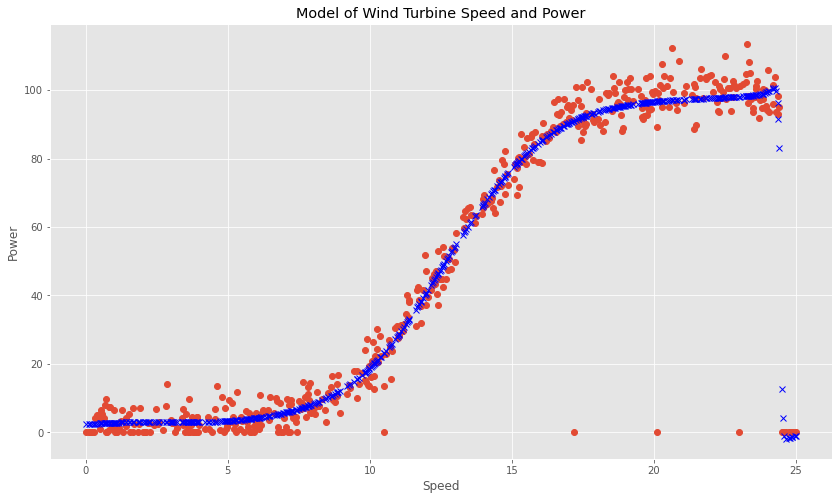

In [69]:
# Plot the values.
plt.plot(powerProductionData['speed'], powerProductionData['power'], 'o');
plt.plot(powerProductionData['speed'], model.predict(powerProductionData['speed']), 'bx');

#label the x axis 
plt.xlabel('Speed')
#label the y axis 
plt.ylabel('Power')
# Set the title
plt.title('Model of Wind Turbine Speed and Power')

***
Here we are saving the model into a h5 file that will be saved and loaded by the web service. The webservice will read in the data and print out a predicted value depending on the user input.

In [76]:
model.save('SavedModelData.h5')

***
The first graph shows the accuracy of the predictions, the lower the value,the better the predictions. The second graph shows the loss of the model while performing the fitting.

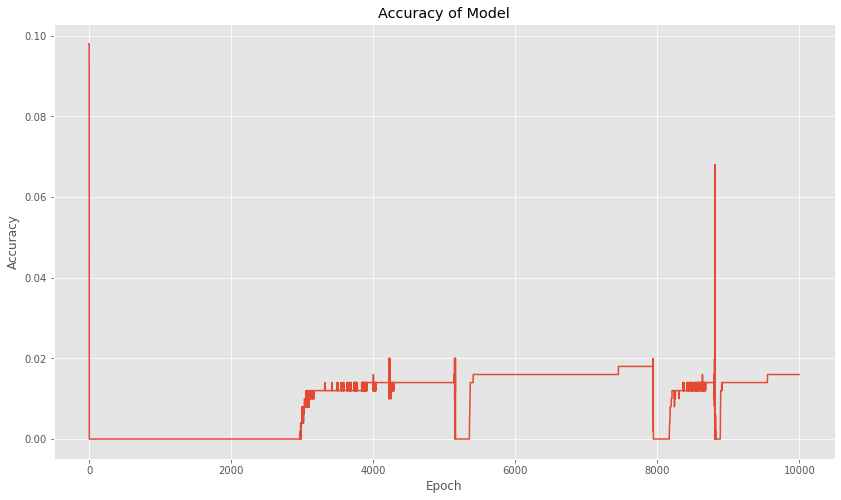

In [77]:
#label the x axis 
plt.xlabel('Epoch')
#label the y axis 
plt.ylabel('Accuracy')
# Set the title
plt.title('Accuracy of Model')

plt.plot(modelHistory.history['accuracy'])

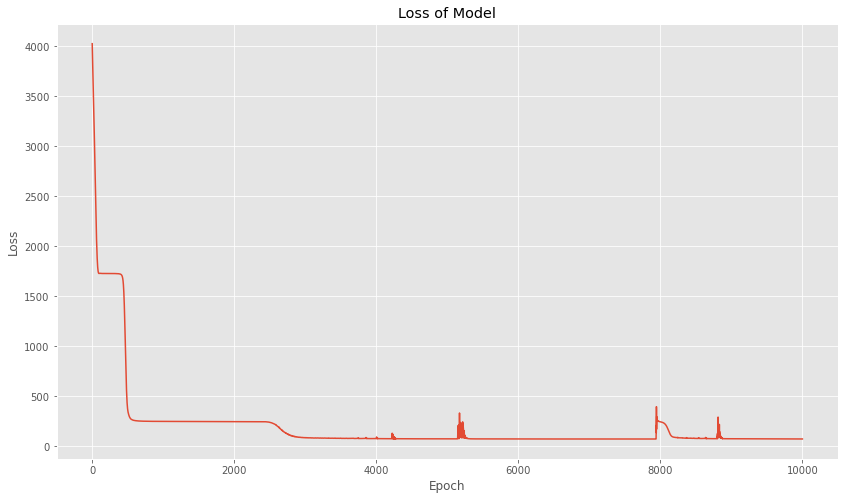

In [72]:
#label the x axis 
plt.xlabel('Epoch')
#label the y axis 
plt.ylabel('Loss')
# Set the title
plt.title('Loss of Model')

plt.plot(modelHistory.history['loss'])

# References

https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/<br>
https://machinelearningmastery.com/how-to-make-classification-and-regression-predictions-for-deep-learning-models-in-keras/<br>
https://www.geeksforgeeks.org/keras-fit-and-keras-fit_generator/<br>

***
## End